# Anomaly Detection with TimeGPT
Nov 10th 2023

In [12]:
import yaml
import pandas as pd
import numpy as np
from nixtlats import TimeGPT
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Plot configs:
sns.set_context("paper", font_scale= 1.5)
plt.rcParams['axes.spines.right']= False
plt.rcParams['axes.spines.top']= False
plotsize = (22, 5)
plt.rcParams['figure.figsize']= plotsize
# Pandas config
pd.options.display.float_format= '{:,.4f}'.format

In [14]:
# token
token_yaml = "token.yml"
with open(token_yaml, "r") as file:
    TOKEN = yaml.safe_load(file)

## 1) Input data

In [15]:
data_path = "data/Temperature_1week.csv"
df = pd.read_csv(data_path, header=None, parse_dates= [0]).rename(columns={0: "timestamp", 1:"temperature"})
df["temperature"] = df["temperature"].str.replace(" °C", "").astype(float)
df

,timestamp,temperature
0,2023-11-03 17:00:00,22.2000
1,2023-11-03 17:05:00,22.3000
2,2023-11-03 17:10:00,22.5000
3,2023-11-03 17:15:00,22.5000
4,2023-11-03 17:20:00,22.6000
...,...,...
2012,2023-11-10 16:40:00,22.3000
2013,2023-11-10 16:45:00,22.3000
2014,2023-11-10 16:50:00,22.3000
2015,2023-11-10 16:55:00,22.3000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    2017 non-null   datetime64[ns]
 1   temperature  2017 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 31.6 KB


<Axes: >

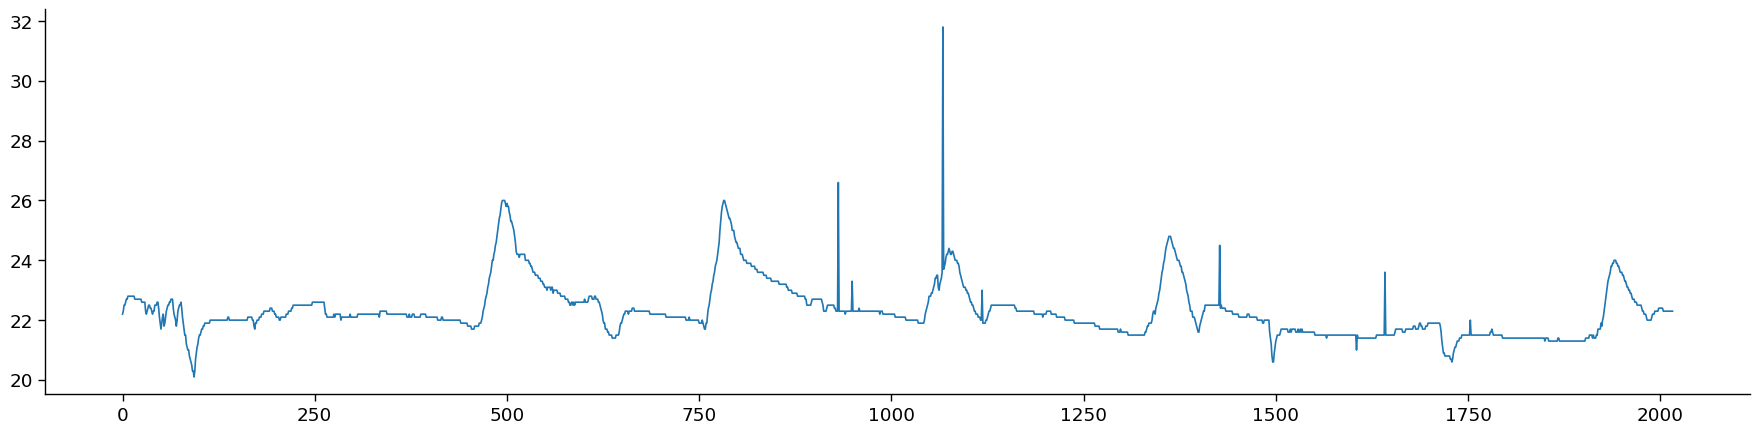

In [20]:
df["temperature"].plot()

## 2) Anomaly Detection
By default, identify anomalies based on a 99% prediction interval. Observations that fall outside this interval are considered anomalies.

In [21]:
timegpt = TimeGPT(token=TOKEN)
timegpt_anomalies_df = timegpt.detect_anomalies(df, 
                                                time_col="timestamp", 
                                                target_col="temperature", 
                                                freq="5T",
                                                level=99)
timegpt_anomalies_df

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Anomaly Detector Endpoint...


,timestamp,anomaly,TimeGPT-lo-99,TimeGPT,TimeGPT-hi-99
0,2023-11-04 03:00:00,0,20.4163,22.0044,23.5924
1,2023-11-04 03:05:00,0,20.4003,21.9883,23.5764
2,2023-11-04 03:10:00,0,20.4077,21.9957,23.5838
3,2023-11-04 03:15:00,0,20.3938,21.9819,23.5699
4,2023-11-04 03:20:00,0,20.3729,21.9610,23.5490
...,...,...,...,...,...
1891,2023-11-10 16:35:00,0,20.5346,22.1226,23.7107
1892,2023-11-10 16:40:00,0,20.5291,22.1171,23.7051
1893,2023-11-10 16:45:00,0,20.5598,22.1478,23.7359
1894,2023-11-10 16:50:00,0,20.5439,22.1319,23.7200


In [22]:
timegpt_anomalies_df["anomaly"].value_counts()

anomaly
0    1822
1      74
Name: count, dtype: int64

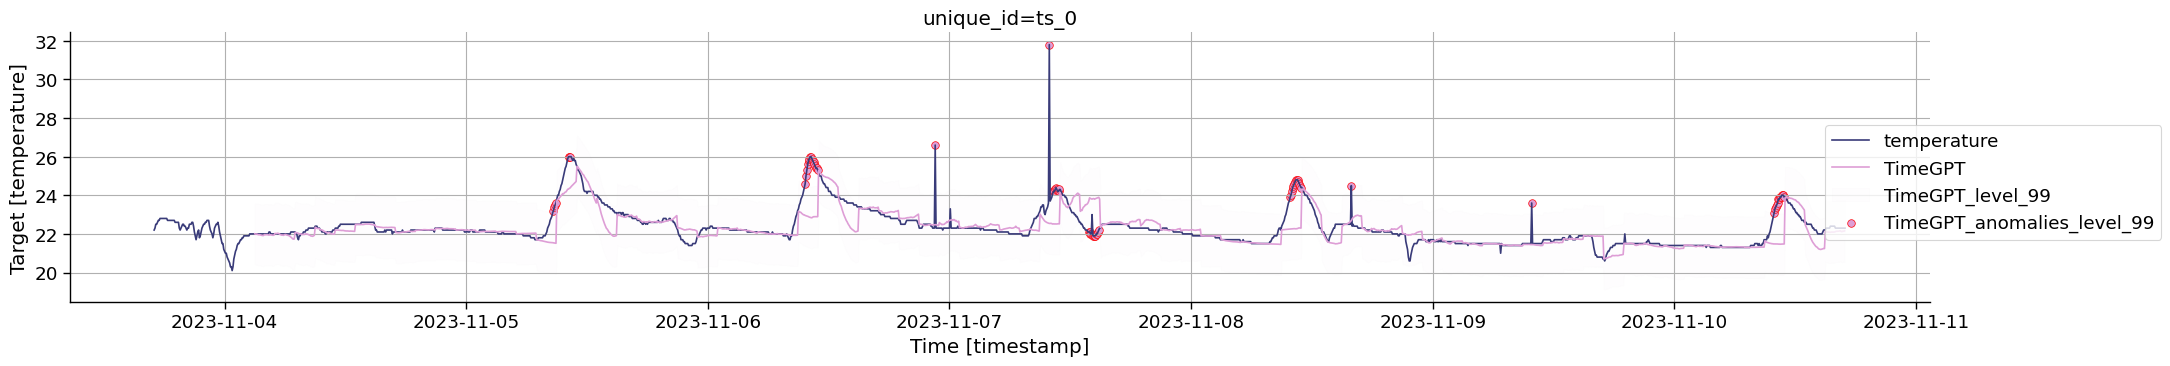

In [26]:
timegpt.plot(df, 
            timegpt_anomalies_df,
            time_col='timestamp', 
            target_col='temperature')